## Mini-Project 2 (Classification)

### Context

Questions
Which factor influenced a candidate in getting placed?
Does percentage matters for one to get placed?
Which degree specialization is much demanded by corporate?

### Content

sl_no: Serial number or unique identifier for each record.

gender: Gender of the student (Male or Female).

ssc_p: Percentage of marks scored in the 10th grade (Secondary School Certificate).

ssc_b: Board of education for the 10th grade (Central/State).

hsc_p: Percentage of marks scored in the 12th grade (Higher Secondary Certificate).

hsc_b: Board of education for the 12th grade (Central/State).

hsc_s: Specialization in the 12th grade (Science, Commerce, or Arts).

degree_p: Percentage of marks scored in the undergraduate degree.

degree_t: Field of specialization in the undergraduate degree (Science, Commerce, or Arts).

workex: Work experience prior to the recruitment process (Yes or No).

etest_p: Percentage of marks scored in the employability test.

specialisation: Post-graduate specialization (MBA or M.Tech).

mba_p: Percentage of marks scored in the MBA.

status: Placement status (Placed or Not Placed).

salary: Salary offered upon placement (in INR).

### data source
#### https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

### 1. Import libraries

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

### 2. Reading data in dataframe

In [47]:
data = pd.read_csv ('/Users/ryanlarsen/Desktop/BOOTCAMP/PROJECTS/MINI-PROJECTS/MINIPROJECT_2/DATA/Placement_Data_Full_Class.csv')
df = pd.DataFrame (data)

In [48]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [49]:
df.shape

(215, 15)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## 3. Data Preprocessing

In [51]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [52]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [53]:
# move status column to the end

# Get the index of the "status" column
status_index = df.columns.get_loc('status')

# Move the "status" column to the last position
df = df[[col for col in df.columns if col != 'status'] + ['status']]

# Print the updated DataFrame
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


In [54]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the unique values in the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(unique_values)
    print()


Column: sl_no
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]

Column: gender
['M' 'F']

Column: ssc_p
[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 

The target variable is the status column, which is stored as placed, and Not Placed

In [55]:
# remove sl_no column 

df=df.drop(["sl_no"],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


### Check for null values

In [56]:
# null values 
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            67
status             0
dtype: int64

In [57]:
# percentage of null values:
df.isnull().mean().round(4) * 100

gender             0.00
ssc_p              0.00
ssc_b              0.00
hsc_p              0.00
hsc_b              0.00
hsc_s              0.00
degree_p           0.00
degree_t           0.00
workex             0.00
etest_p            0.00
specialisation     0.00
mba_p              0.00
salary            31.16
status             0.00
dtype: float64

In [58]:
# 31.16% of missing Salary values
# missing values will be imputed witht the mean
mean_salary = df['salary'].mean()
df['salary'] = df['salary'].fillna(mean_salary)


In [59]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
status            0
dtype: int64

In [60]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,77457.900102
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,288655.405405
75%,75.700000,73.000000,72.000000,83.500000,66.255000,288655.405405
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## EDA

In [61]:
import pandas_profiling
df.profile_report(title='Placement - Report',progress_bar=False)

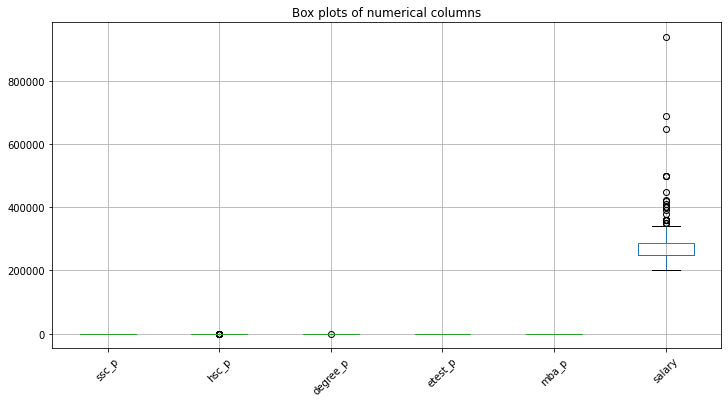

In [62]:
# check for outliers:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Box plots of numerical columns")
plt.show()


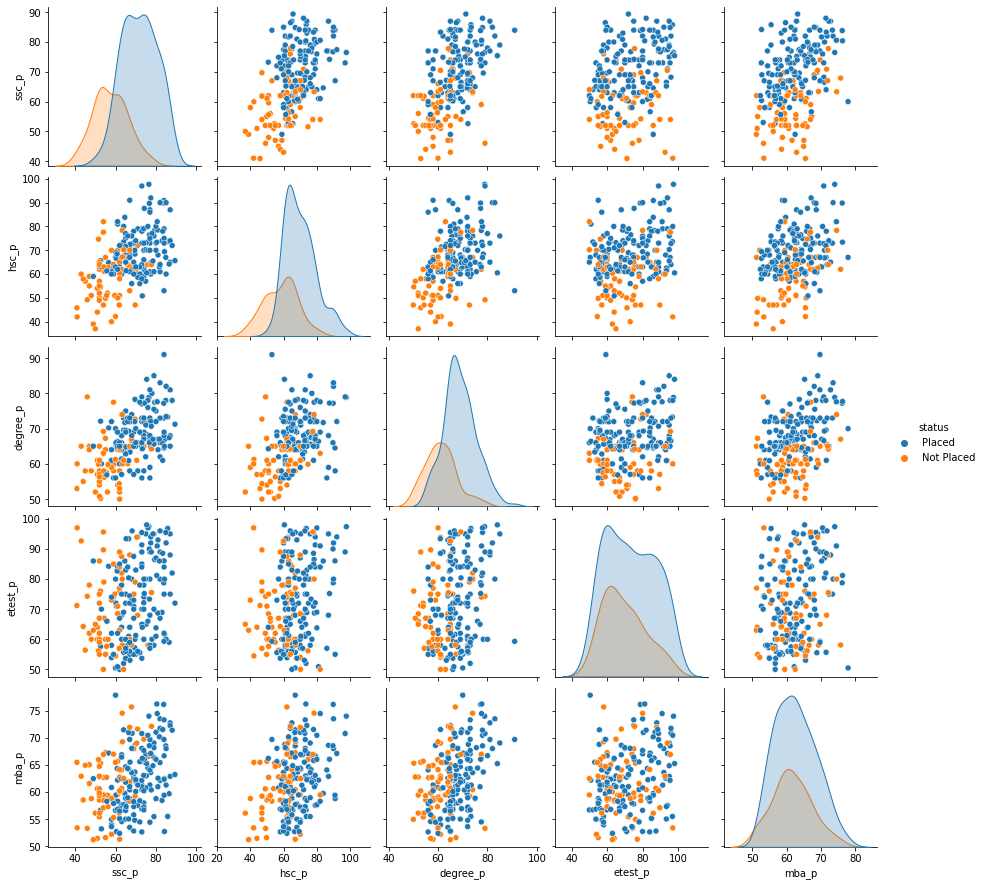

In [63]:
sns.pairplot(df.drop('salary', axis = 1), hue = 'status')


#### Does gender affect placements?

In [64]:
# does gender affect placements?
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

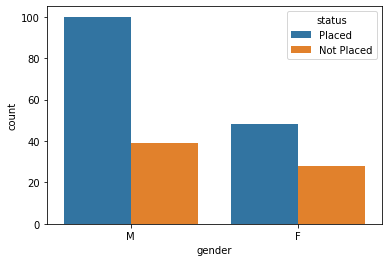

In [65]:
sns.countplot(data = df, x = 'gender', hue = 'status')

Text(0.5, 0, 'Salary (100k)')

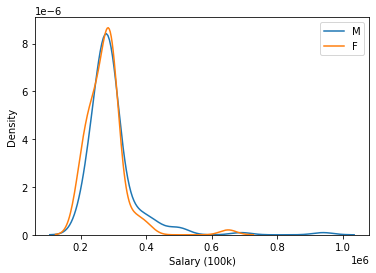

In [66]:
sns.kdeplot(df.salary[df.gender=='M'])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<Axes: xlabel='salary', ylabel='gender'>

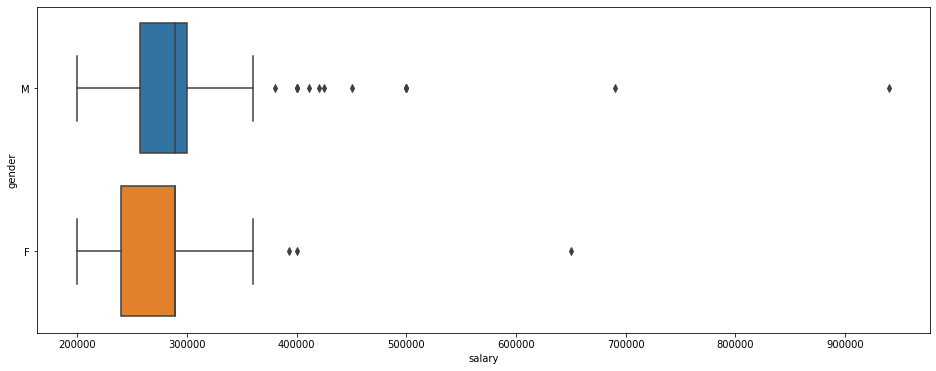

In [67]:
plt.figure(figsize = (16, 6))
sns.boxplot (x = 'salary', y = 'gender', data = df)

In [68]:
df.gender[df.status == 'Not Placed'].value_counts()

M    39
F    28
Name: gender, dtype: int64

--- Insights---
- 139 Male studets and 76 Female students
- Not placed: 28 Female and 39 Male. 
- Male students appear to have higher placemet rates.
- There are more outliers on Male (indicate Male students are getting high salary jobs) than Females.
- Males: offered slightly greater salary than female (average).

### Secondary education 

Text(0.5, 0, 'Secondary Education Percentage')

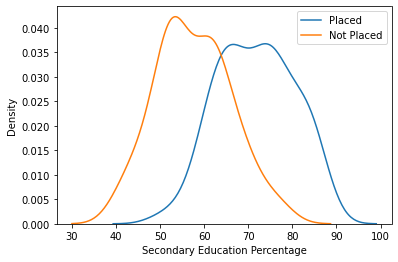

In [69]:
sns.kdeplot(df.ssc_p[df.status == 'Placed'])
sns.kdeplot(df.ssc_p[df.status == 'Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('Secondary Education Percentage')

--- Insights---
- Students with good secondary education percentage are placed on average 

### Feature selection

In [70]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming the dataset is stored in a DataFrame called 'data'
# Extract the features (X) and the target variable (y)
X = data.drop(['status'], axis=1)
y = data['status']

# Store the column names before imputation
feature_names = X.columns.tolist()

# Encode categorical features
encoder = LabelEncoder()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Apply chi-square test for feature selection
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

# Get the scores and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to store the scores and p-values
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores, 'P-value': p_values})
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Print the feature scores
print(feature_scores)


           Feature         Score       P-value
0            ssc_p  1.377393e+02  8.310241e-32
1            hsc_p  9.244931e+01  6.907141e-22
2         degree_p  4.020490e+01  2.286745e-10
3           workex  1.074548e+01  1.045341e-03
4          etest_p  8.522679e+00  3.507478e-03
5   specialisation  7.539357e+00  6.036558e-03
6            sl_no  5.532155e+00  1.867009e-02
7            mba_p  6.918568e-01  4.055335e-01
8           gender  6.248052e-01  4.292672e-01
9            ssc_b  1.613595e-01  6.879080e-01
10        degree_t  1.170835e-01  7.322195e-01
11           hsc_s  5.887591e-02  8.082815e-01
12           hsc_b  2.411786e-02  8.765854e-01
13          salary  7.757540e-24  1.000000e+00


In [71]:
# Print the best feature
best_feature = feature_scores.iloc[0]['Feature']
print("Best Feature:", best_feature)

Best Feature: ssc_p


In [72]:
# ssc_p (Score: 137.739, P-value: 8.310241e-32)

In [73]:
### Feature encoding
# Gender:         0 = Female, 1 = Male 
# ssc_b:          0 = Central, 1 = Others
# hsc_b:          0 = Central, 1 = Others 
# hsc_s:          0 = Arts, 1 = Commerce, 2 = Science
# degree_t:       0 = Comm&Mgmt, 1 = Others ,2 = Sci&Tech
# workex:         0 = No, 1 = Yes
# specialisation: 0 = Mkt&Fin, 1 = Mkt&HR
# Status:         0 = Not Placed, 1 = Placed

In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# create copy of original df
df_encoded = df.copy()

# Apply label encoding on categorical columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Print the encoded DataFrame
df_encoded


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.000000,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.000000,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.000000,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,288655.405405,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.000000,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.000000,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.000000,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.000000,1


In [75]:
df_encoded.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531,1.291073e-01,9.067040e-02
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478,2.357072e-02,6.078887e-01
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120,4.603322e-03,3.729651e-02
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823,5.450558e-02,4.912279e-01
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201,-6.247140e-03,1.694454e-02
hsc_s,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345,5.998181e-02,3.344214e-02
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364,-1.414817e-02,4.798610e-01
degree_t,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666,1.414271e-01,-2.035216e-02
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811,1.184562e-01,2.760600e-01
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055,1.528286e-01,1.276394e-01


- The feature with the highest correlation with the "status" column (placement) is "ssc_p" with a correlation coefficient of 0.607889. This indicates a relatively strong positive correlation between the secondary school percentage (ssc_p) and the placement status.

- Therefore, according to the given correlation matrix, "ssc_p" is the best feature for predicting placement.






### Machine Learning

In [76]:
# single feature (ssc_p)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and target variable
X = df[['ssc_p']]
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy_single = accuracy_score(y_test, y_pred)
precision_single = precision_score(y_test, y_pred, pos_label='Placed')
recall_single = recall_score(y_test, y_pred, pos_label='Placed')
f1_single = f1_score(y_test, y_pred, pos_label='Placed')

# Print the evaluation metrics
print("Performance scores (ssc_p)")
print("Accuracy:", accuracy_single)
print("Precision:", precision_single)
print("Recall:", recall_single)
print("F1-score:", f1_single)


Performance scores (ssc_p)
Accuracy: 0.7906976744186046
Precision: 0.84375
Recall: 0.8709677419354839
F1-score: 0.8571428571428571


In [77]:
# confusion matrix

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix (scc_p):")
print(cm)


Confusion Matrix (scc_p):
[[ 7  5]
 [ 4 27]]


In [78]:
# combined features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Separate the features and target variable
X = df.drop('status', axis=1)  # excluding the target variable
y = df['status']

# Perform one-hot encoding on the categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
classifier = LogisticRegression(max_iter=1000)

# Train the model and make predictions
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Placed')
recall = recall_score(y_test, y_pred, pos_label='Placed')
f1 = f1_score(y_test, y_pred, pos_label='Placed')

# Print the evaluation metrics
print("Performance scores (combined):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Performance scores (combined):
Accuracy: 0.8372093023255814
Precision: 0.8333333333333334
Recall: 0.967741935483871
F1-score: 0.8955223880597015


In [82]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (Combined):')
print(matrix)


Confusion Matrix (Combined):
[[ 6  6]
 [ 1 30]]


- Based on these scores, it appears that the model trained on the combined set of features performs better overall. It has higher accuracy, precision, recall, and F1-score compared to the model trained only on the "ssc_p" feature. 

### Precision-recall curve

Average Precision: 0.9532776498616944


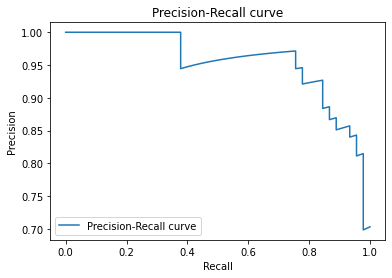

In [83]:
# performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, stratify=y, test_size=0.3, random_state=1)

# Extract the feature columns
feature_columns = df_encoded.columns.drop('status')
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_features, y_train)

# Get the predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test_features)[:, 1]

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred_prob, pos_label='Placed')
print("Average Precision:", average_precision)

# Calculate precision and recall values at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label='Placed')

# Create a plot for the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')

# Set labels and title for the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

# Display the legend
plt.legend(loc='lower left')

# Show the plot
plt.show()


#########################################

In [86]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming you have the DataFrame df with the target variable 'status'

# Separate the features and target variable
X = df.drop('status', axis=1)
y = df['status']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize the RFE selector
rfe_selector = RFE(estimator=model)

# Fit the RFE selector on the training data
X_train_selected = rfe_selector.fit_transform(X_train, y_train)

# Get the selected feature indices
feature_indices = rfe_selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[feature_indices]

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Predict probabilities on the test set using selected features
X_test_selected = X_test[selected_features]
y_pred_proba = model.predict_proba(X_test_selected)

# Calculate AUC-ROC score on the test set
auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC-ROC:", auc_roc)

# Hyperparameter tuning using grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']  # Only 'l2' penalty for lbfgs solver
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = LogisticRegression(max_iter=1000, C=best_params['C'], penalty=best_params['penalty'])
best_model.fit(X_train_selected, y_train)

# Predict probabilities on the test set using the best model
y_pred_proba_best = best_model.predict_proba(X_test_selected)

# Calculate AUC-ROC score on the test set using the best model
auc_roc_best = roc_auc_score(y_test, y_pred_proba_best[:, 1])
print("AUC-ROC (Best Model):", auc_roc_best)


AUC-ROC: 0.9086021505376344
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
AUC-ROC (Best Model): 0.9086021505376344


In [87]:
#####
grid_search_best = grid_search.best_estimator_
print('Best Estimator')
grid_search_best

Best Estimator


LogisticRegression(C=1, max_iter=1000)

C=1: The C parameter in logistic regression controls the inverse of regularization strength. A smaller value of C indicates stronger regularization, while a larger value of C reduces the effect of regularization. In this case, the C parameter is set to 1, suggesting a moderate level of regularization.

max_iter=1000: The max_iter parameter defines the maximum number of iterations for the logistic regression solver to converge. It determines the maximum number of iterations the algorithm will perform to optimize the model's parameters. In this case, the maximum number of iterations is set to 1000.

The C value can be tuned to control the balance between model complexity and overfitting, while the max_iter value can be adjusted to ensure that the logistic regression algorithm converges within a reasonable number of iterations.

ROC-AUC: 0.9086021505376344


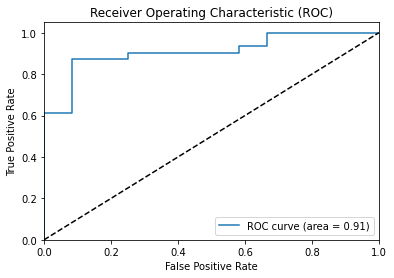

In [88]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming you have the DataFrame df with the target variable 'status'

# Separate the features and target variable
X = df.drop('status', axis=1)
y = df['status']

# Convert the target variable to binary values
y_binary = pd.Series([1 if label == 'Placed' else 0 for label in y])

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize the RFE selector
rfe_selector = RFE(estimator=model)

# Fit the RFE selector on the training data
X_train_selected = rfe_selector.fit_transform(X_train, y_train)

# Get the selected feature indices
feature_indices = rfe_selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[feature_indices]

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Predict probabilities on the test set using selected features
X_test_selected = X_test[selected_features]
y_pred_proba = model.predict_proba(X_test_selected)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [89]:
# accuracy score for the ROC-AUC curve: 
print('ROC-AUC accuray score:', roc_auc)

ROC-AUC accuray score: 0.9086021505376344


In [90]:
###################

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [92]:
from sklearn.preprocessing import StandardScaler

# Get the feature columns from df_encoded
feature_columns = df_encoded.columns.drop('status')
X_features = df_encoded[feature_columns]

# Scale the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

# Combine the scaled features with the target column
df_scaled['status'] = df_encoded['status']

# Print the scaled DataFrame
print("Scaled DataFrame:")
df_scaled


Scaled DataFrame:


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,0.739434,-0.028087,1.082459,2.268812,0.800763,-0.641955,-1.140102,1.576284,-0.724446,-1.291091,1.123903,-0.597647,-2.414078e-01,1
1,0.739434,1.113369,-0.923823,1.103448,0.800763,1.083298,1.513267,1.576284,1.380364,1.087157,-0.889757,0.687620,-1.147234e+00,1
2,0.739434,-0.213238,-0.923823,0.153313,-1.248809,-2.367207,-0.322843,-0.675550,-0.724446,0.218908,-0.889757,-0.769474,-5.002152e-01,1
3,0.739434,-1.046417,-0.923823,-1.318339,-1.248809,1.083298,-1.957362,1.576284,-0.724446,-0.460592,1.123903,-0.489396,-7.532285e-16,0
4,0.739434,1.712332,-0.923823,0.668391,-1.248809,-0.641955,0.943909,-0.675550,-0.724446,1.864806,-0.889757,-1.164676,1.764349e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.739434,1.230940,1.082459,1.441008,0.800763,-0.641955,1.529612,-0.675550,-0.724446,1.426906,-0.889757,2.098321,1.440840e+00,1
211,0.739434,-0.861266,1.082459,-0.582513,0.800763,1.083298,0.766836,1.576284,-0.724446,0.143408,-0.889757,-1.487711,-1.767060e-01,1
212,0.739434,-0.028087,1.082459,0.061335,0.800763,-0.641955,0.903046,-0.675550,1.380364,-0.989091,-0.889757,1.278706,8.210139e-02,1
213,-1.352386,0.619941,1.082459,-0.030644,0.800763,-0.641955,-1.140102,-0.675550,-0.724446,-0.158592,1.123903,-0.351934,-1.095472e+00,1


In [93]:
# scaled data

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

# Separate the features and target variable
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']

# Convert the target variable to binary values (1 for 'Placed' and -1 for other)
y_binary = pd.Series([1 if label == 'Placed' else -1 for label in y])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the One-Class SVM model
model = OneClassSVM()

# Train the model
model.fit(X_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Perform accuracy calculation or other evaluation metrics suitable for single-class classification

# Example of accuracy calculation
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.4186046511627907


In [94]:
# scaled data - SVM


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

# Separate the features and target variable
X = df.select_dtypes(include=['float64', 'int64'])  # Include only numeric columns
y = df['status']

# Convert the target variable to binary values (1 for 'Placed' and -1 for other)
y_binary = pd.Series([1 if label == 'Placed' else -1 for label in y])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Perform feature scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the One-Class SVM model
model = OneClassSVM()

# Train the model
model.fit(X_train_scaled)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Perform accuracy calculation or other evaluation metrics suitable for single-class classification

# Example of accuracy calculation
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.46511627906976744


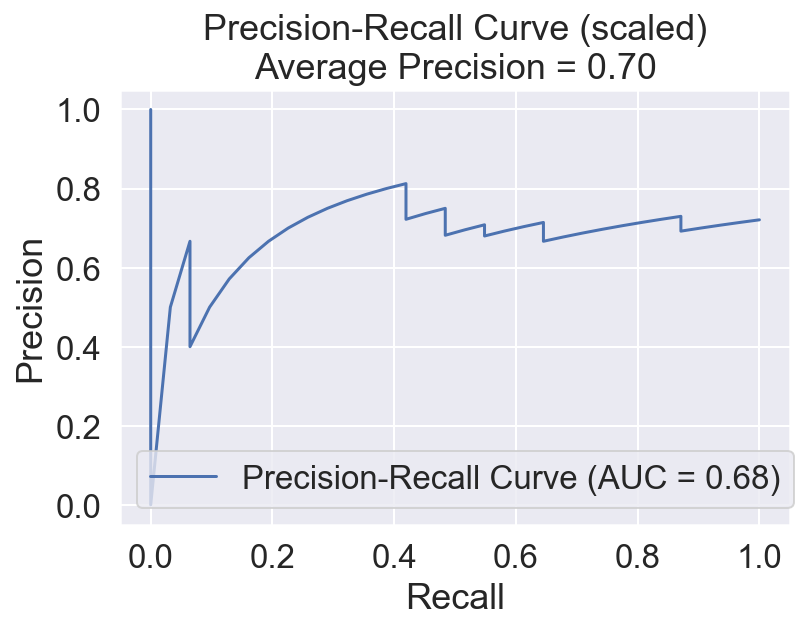

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

# Assuming you have the DataFrame 'df' with the target variable 'status'

# Separate the features and target variable
X = df.drop('status', axis=1)
y = df['status']

# Convert the target variable to binary values
y_binary = np.where(y == 'Placed', 1, 0)

# Perform one-hot encoding on categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Perform feature scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the One-Class SVM model
model = OneClassSVM()

# Train the model on the training data
model.fit(X_train_scaled)

# Convert y_test to binary values (1 for positive class and 0 for negative class)
y_binary_test = label_binarize(y_test, classes=[0, 1])

# Compute the decision function scores for the test set
decision_scores = model.decision_function(X_test_scaled)

# Compute precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_binary_test, decision_scores)

# Reverse the precision and recall arrays
precision = precision[::-1]
recall = recall[::-1]

# Calculate the average precision score
average_precision = average_precision_score(y_binary_test, decision_scores)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the reversed precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (scaled)\nAverage Precision = %0.2f' % average_precision)
plt.legend(loc='lower left')
plt.show()


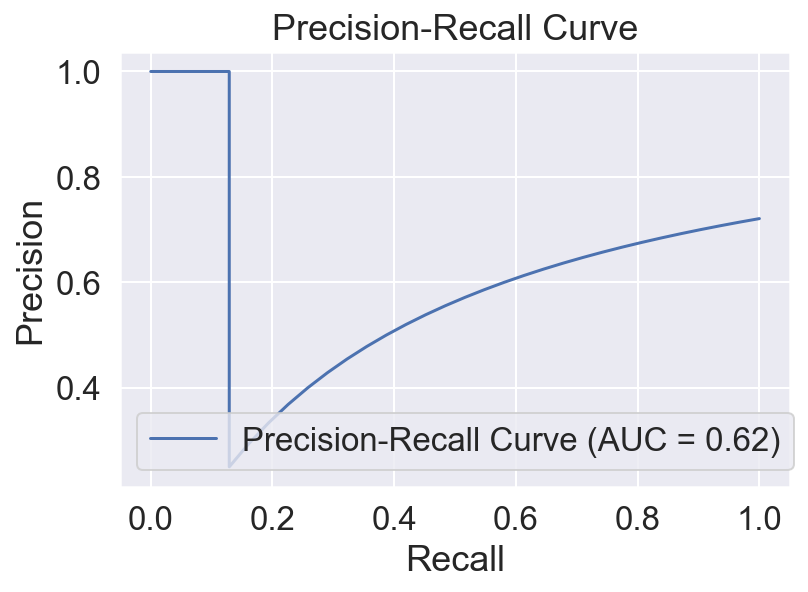

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

# Assuming you have the DataFrame 'df' with the target variable 'status'

# Separate the features and target variable
X = df.drop('status', axis=1)
y = df['status']

# Convert the target variable to binary values
y_binary = np.where(y == 'Placed', 1, 0)

# Perform one-hot encoding on categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the One-Class SVM model
model = OneClassSVM()

# Train the model on the training data
model.fit(X_train)

# Convert y_test to binary values (1 for positive class and 0 for negative class)
y_binary_test = label_binarize(y_test, classes=[0, 1])

# Compute the decision function scores for the test set
decision_scores = model.decision_function(X_test)

# Compute precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_binary_test, decision_scores)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
